# Individual Assignment A1

This assessment is marked out of 50 and comprises 50% of the final course mark.

Due by 23:59 on Monday November 16, to be submitted via email to k.zygalakis@ed.ac.uk.

### Academic misconduct

The assessment is primarily summative in nature. You are expected to be aware of and abide by University policies on academic misconduct.

- [School of Mathematics academic misconduct advice and policies](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)
- [Academic Services academic misconduct information](https://www.ed.ac.uk/academic-services/students/conduct/academic-misconduct)

**This is an individual assignment - do not share your work with another student or copy the work of another student.**

If you use any resources (e.g. textbooks or websites) then include appropriate references in your solutions. Course materials do not need to be referenced, but you should clearly state which results you are using.


### Code commentary

Your code should be extensively commented, with the functionality of each line of code explained with a comment. This is to test your understanding of the code you have written. Up to half of the marks associated with the coding part of a question may be deducted for a missing, incomplete, or inaccurate code commentary.

Your comments should explain what the code does, as well as why it does it.

The following provides an example of the expected level of commenting.

In [ ]:
def is_prime(n):
    """
    Return whether an input positive integer is prime.
    """
    
    if n == 1:        # If n is 1 ...
        return False  # ... then n is not prime
    
    for i in range(2, n):  # Test integers i from 2 to n - 1 inclusive
        if n % i == 0:     # If n is divisible by i ...
            return False   # ... then n is not prime
    # If n is not divisible by any integers from 2 to n - 1 inclusive then n is
    # prime
    return True

### Output 

Your code must generate and display all relevant output when run. Rerun your code cells after editing your code, to make sure that the output is updated.

### Markdown cells

You can enter your answers to theoretical questions in the Markdown cells provided in this notebook. To start editing the cell, press shift+enter or double click on it. You can use basic Latex. To render the cell, press shift+enter or run.

Alternatively, you can submit a pdf of your hand-written and scanned in answers to the email above, alongside this notebook.

## Numerical methods



### Gradient descent

$$
x_{n+1}=x_{n}-h \nabla f(x_{n})
$$

#### Convex
$ h= \frac{1}{L} $

#### Strongly Convex
$ h=\frac{2}{\mu+L}$


### Nesterov 

\begin{align}
x_{k+1} &= y_{k}-\frac{1}{L} \nabla f(y_{k}) \\
y_{k+1} &= x_{k+1}+\gamma_{k}(x_{k+1}-x_{k})
\end{align}

#### Convex
$$\gamma_{k} = \frac{t_{k}-1}{t_{k+1}}, \quad t_{k+1}=\frac{1}{2} \left(1+\sqrt{1+4t^{2}_{k}} \right), \quad t_{-1}=1 $$

#### Strongly Convex
$$ \gamma_{k} = \frac{\sqrt{L}-\sqrt{\mu}}{\sqrt{L}+\sqrt{\mu}} $$ 




# Question 1: Polynomial Regression

Consider the least squares regression problem introduced in lectures, where we wish to reconstruct an unknown function from noisy point values. Suppose we are given a set of points $\{u_i, y_i\}_{i=1}^m$, and we want to find the degree $n-1$ polynomial that best fits these points.  In other words, we want to learn the unknown coefficients $\{x_j\}_{j=1}^n$ in the polynomial
$$
f(u; x) = \sum_{j=1}^{n} {x_j} u^{j-1}, 
$$
such that the residual $\sum_{i=1}^m (y_i - f(u_i;x))^2$ is minimised.


### 1.1

Show that the regression problem above can be formulated as the linear inverse problem

$$
x^* = \text{argmin} \frac{1}{2} \|A x - y\|_2^2,
$$

where $y = \{y_i\}_{i=1}^m \in \mathbb R^m$ and $A \in \mathbb R^{m \times n}$ is the Vandermonde matrix with entries $a_{ij} = u_i^{j-1}$.

*Enter your solution here*

We are aiming to minimise the residual with respect to the coefficients $\{x_j\}_{j=1}^n$. This means we are trying to find the optimum values for $\{x_j\}_{j=1}^n = x^*$ such that the right hand side of the following equation is minimised:
$$x^* = \text{argmin}_{x_j} \sum_{i=1}^m\left( y_i - \sum_{j=1}^n x_ju_i^{j-1}  \right)^2$$

We can sub in $A \in \mathbb R^{m \times n}$, the Vandermonde matrix with entries $a_{ij} = u_i^{j-1}$, to get:
$$x^* = \text{argmin}_{x} \sum_{i=1}^m\left( y_i - \sum_{j=1}^n a_{ij}x_j  \right)^2$$

$$x^* = \text{argmin}_{x} \sum_{i=1}^m\left( y_i - (Ax)_i  \right)^2$$

We now see that this is just the definition of the square norm of the vector $y - Ax$, which equals the squared norm of the vector $Ax - y$:

$$x^* = \text{argmin}_{x} \|Ax-y\|^2_2$$

Finally, to match the expression given in the question, we note that multiplying the expression on the right hand side by a constant scalar, 1/2, will not make a difference when we take the argmin. This is because whichever $x$ is the minimiser of the expression, will also be the minimiser of this constant scaling of the expression:
$$x^* = \text{argmin}_{x} \frac{1}{2}\|Ax-y\|^2_2$$

### 1.2

Show that the gradient of $\frac{1}{2} \|A x - y\|_2^2$ with respect to $x$ is 

$$A^\mathrm T A x - A^\mathrm T y.$$

*Enter your solution here*

First, we get rid of the norm so that the expression is easier to work with:

\begin{align}
\frac{1}{2}||Ax-y||^2_2 &= \frac{1}{2}\sum_{i=1}^m\left( y_i - (Ax)_i \right)^2 \\
&= \frac{1}{2}\sum_{i=1}^m\left( y_i - \sum_{j=1}^na_{ij}x_j \right)^2
\end{align}

Now, take the gradient with respect to a single coefficient, $x_k$. Note that $\frac{\partial x_j}{\partial x_k} = \delta_{jk}$:

\begin{align}
\frac{\partial}{\partial x_k}\left(  \frac{1}{2}\sum_{i=1}^m\left(\sum_{j=1}^na_{ij}x_j - y_i \right)^2 \right) &= \sum_{i=1}^m\left(\sum_{j=1}^na_{ij}x_j - y_i \right)a_{ij}\delta_{jk} \\
&= \sum_{i=1}^m\left(\sum_{j=1}^na_{ij}x_j - y_i \right)a_{ik} \\
&= \sum_{i=1}^m\left((Ax)_i - y_i\right)a_{ik} \\
&= \sum_{i=1}^ma_{ik}\left((Ax)_i - y_i\right) \\
&= (A^\mathrm T A x)_k - (A^\mathrm T y)_k
\end{align}

In the second last line, we used that each $a_{ij}$ is just a scalar so it is commutative under multiplication. In the final line, we used the following equations. Note the difference in the positioning of the index that we are summing over as this distinguishes $A^\mathrm T$ from $A$: 
$$(A^\mathrm T x)_k = \sum_{i=1}^m a_{ik}x_i$$       $$(A x)_k = \sum_{i=1}^n a_{ki}x_i$$

Thus, as $\nabla_k = \frac{\partial}{\partial x_k}$:
$$\nabla_k\left(\frac{1}{2} \|A x - y\|_2^2\right) = (A^\mathrm T A x)_k - (A^\mathrm T y)_k$$
Finally, getting rid of the index $k$:
$$\nabla\left(\frac{1}{2} \|A x - y\|_2^2\right) = A^\mathrm T A x - A^\mathrm T y$$
as required.

### 1.3 

In the code cell below, implement the method of gradient descent to compute a minimiser $x^*$. You should choose a suitable step size $h$.

Test your method on the simple, noise-free example given at the bottom of the code cell, to which the answer is $x = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$.

In [37]:
import numpy as np

# add code here

"""define necessary numerical constants"""

h = 0.1          #step size
rtol = 1e-5      #relative tolerance - how close the gradient should be to 0 at the minimiser
atol = 1e-9      #absolute tolerance - how close the gradient should be to 0 at the minimiser

"""define initial estimate for the coefficients"""

x0 = np.array([0.,0.])


def grad1(As, x, y):
    
    """compute the derivative of the residual, according to the formula from 1.2"""
    """inputs are an array with [A^T.A, A^T.y], current estimate for co-efficients (x), target data (y)"""
    """returns the gradient"""
    
    return np.matmul(As[0],x) - As[1]      #return A^T.A.x - A^T.y


def gradDesc(As, x0, u, y, h, grad, metrics=False):
    
    """implement the full gradient descent method"""
    """inputs are an array with [A^T.A, A^T.y], initial estimate for co-efficients (x0), input data (u and y), the step size (h), the gradient function (grad) and a boolean"""
    """returns the numerical minimiser (x^*) or how the gradients improve with iterations"""
    
    x = x0                                 #load the initial estimate
    gradient = grad(As, x, y)               #load the initial value for the gradient - note this could also be initialised to array of 1s here
    targetGrad = np.zeros_like(gradient)   #create a matrix of 0s like the gradient as
                                             #want every component of the gradient to be sufficiently close to zero
    
    if metrics==True:                      #if storing the performance of the algorithm...
        gradientDists = []                 #...create an array to store the Euclidean norms of the gradient
    
    while not (np.allclose(targetGrad, gradient, rtol, atol)):   #Stops if absolute(gradient) <= (atol + rtol * absolute(gradient))
                                                                 #will keep iterating until the gradient of the residual 
                                                                   #is sufficiently close to zero
        
        gradient = grad(As, x, y)           #compute next value of gradient
        x -= h*gradient                    #compute the next iteration of x
        #print(x)
        
        if metrics==True:                                    #if storing the performance of the algorithm...
            gradientDists.append(np.linalg.norm(gradient))   #...store the Euclidean norms from 0 of the gradient
    
    print("Final gradient : ", gradient)   #print the final value for the gradient - should be very close to 0 
    
    if metrics==False:                     #if we don't want the performance...     
        return x                           #...return the minimiser
    else:                                  #if we do want the performance...
        return gradientDists               #...return the Euclidean norms of the gradients at each iteration
        
# Testing the function on a small example
u = np.array([-0.5, 0, 0.5])
y = np.array([0., 1., 2.])
A = np.array([[1., -0.5],[1., 0.],[1., 0.5]])

AtA = np.matmul(A.T, A)
Aty = np.matmul(A.T, y)

print("Minimiser equals : ", gradDesc([AtA, Aty], x0, u, y, h, grad1))


Final gradient :  [-4.44089210e-16 -9.50736379e-10]
Minimiser equals :  [1. 2.]


### 1.4

In the code cell below, implement the Nestorov method both for convex and strongly convex objectives and  compute a minimiser $x_{*}$. 

Test your method on the simple, noise-free example given at the bottom of the code cell, to which the answer is $x = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$.

In [39]:
import numpy as np

# add code here

"""define necessary numerical constants"""

L = 10           #Lipschitz gradient constant
mu = 1           #continuously differentiable constant for strong convexity
rtol = 1e-5      #relative tolerance - how close the gradient should be to 0 at the minimiser
atol = 1e-9      #absolute tolerance - how close the gradient should be to 0 at the minimiser

"""define initial estimate for the coefficients"""

x0 = np.array([0.,0.])


def nesterov(As, x0, u, y, L, grad, metrics=False):
    
    """implement the full Nesterov method for convex functions"""
    """inputs are an array with [A^T.A, A^T.y], initial estimate for co-efficients (x0), input data (u and y), the Lipschitz constant (L), the gradient function (grad) and a boolean"""
    """returns the numerical minimiser (x^*) or how the gradient improves with iterations"""
    
    ta = 0.5*(1+np.sqrt(1+4))              #now need to keep track of two t values
    tb = 0.5*(1+np.sqrt(1+4*ta**2))        #load ta = t0, tb = t1 to initialise sequence of t values
    
    gamma = (ta - 1)/tb                    #load initial value of gamma = (t0 - 1)/t1
    
    x = x0                                 #load the initial estimates for x0 and z0 (z_k = y_k from notes as y already denotes the input data)
    z = x0                                 #can see from formula that gamma_{-1} = 0 so x0 = z0
    
    gradient = grad(As, z, y)               #load the initial value for the gradient - note this could also be initialised to array of 1s here
    targetGrad = np.zeros_like(gradient)   #create a matrix of 0s like the gradient as
                                             #want every component of the gradient to be sufficiently close to zero
    
    if metrics==True:                      #if storing the performance of the algorithm...
        gradientDists = []                 #...create an array to store the Euclidean norms of the gradient
    
    while not (np.allclose(targetGrad, gradient, rtol, atol)):   #Stops if absolute(gradient) <= (atol + rtol * absolute(gradient))
                                                                 #will keep iterating until the gradient of the residual 
                                                                   #is sufficiently close to zero
        
        gradient = grad(As, z, y)           #compute next value of gradient
                                           #now update the sequences x and z
        xNew = x - 1./L*gradient           #cannot just overwrite x with next iteration as the sequence z
        z = xNew + gamma*(xNew - x)           #depends on both x_{k} and x_{k+1}
        
        x = xNew                           #now overwrite x with xNew
        
        ta = tb                            #shift the sequence of t values along so t_{k} <- t_{k+1}
        tb = 0.5*(1+np.sqrt(1+4*ta**2))    #update t_{k+1}
        
        gamma = (ta - 1)/tb                #update the value of gamma
        
        if metrics==True:                                    #if storing the performance of the algorithm...
            gradientDists.append(np.linalg.norm(gradient))   #...store the Euclidean norms from 0 of the gradient
    
    print("Convex final gradient : ", gradient)   #print the final value for the gradient - should be very close to 0 
    
    if metrics==False:                     #if we don't want the performance...     
        return x                           #...return the minimiser
    else:                                  #if we do want the performance...
        return gradientDists               #...return the Euclidean norms of the gradients at each iteration

def nesterovStrong(As, x0, u, y, L, mu, grad, metrics=False):
    
    """implement the full Nesterov method for strongly convex functions"""
    """inputs are an array with [A, A^T.A, A^T.y], initial estimate for co-efficients (x0), input data (u and y), Lipschitz constant (L), cont. diff. constant (mu), the gradient function (grad) and a boolean"""
    """returns the numerical minimiser (x^*) or how the gradients improve with iterations"""
       
    gamma = (np.sqrt(L)-np.sqrt(mu))/(np.sqrt(L)+np.sqrt(mu))   #calculate the constant value of gamma
    
    x = x0                                 #load the initial estimates for x0 and z0 (z_k = y_k from notes as y already denotes the input data)
    z = x0                                 #can see from formula that gamma_{-1} = 0 so x0 = z0
    
    gradient = grad(As, z, y)               #load the initial value for the gradient - note this could also be initialised to array of 1s here
    targetGrad = np.zeros_like(gradient)   #create a matrix of 0s like the gradient as
                                             #want every component of the gradient to be sufficiently close to zero
    
    if metrics==True:                      #if storing the performance of the algorithm...
        gradientDists = []                 #...create an array to store the Euclidean norms of the gradient
    
    while not (np.allclose(targetGrad, gradient, rtol, atol)):   #Stops if absolute(gradient) <= (atol + rtol * absolute(gradient))
                                                                 #will keep iterating until the gradient of the residual 
                                                                   #is sufficiently close to zero
        
        gradient = grad(As, z, y)           #compute next value of gradient
                                           #now update the sequences x and z
        xNew = x - 1./L*gradient           #cannot just overwrite x with next iteration as the sequence z
        z = xNew + gamma*(xNew - x)           #depends on both x_{k} and x_{k+1}
        
        x = xNew                           #now overwrite x with xNew
        
        if metrics==True:                                    #if storing the performance of the algorithm...
            gradientDists.append(np.linalg.norm(gradient))   #...store the Euclidean norms from 0 of the gradient
    
    print("Strongly Convex final gradient : ", gradient)   #print the final value for the gradient - should be very close to 0 
    
    if metrics==False:                     #if we don't want the performance...     
        return x                           #...return the minimiser
    else:                                  #if we do want the performance...
        return gradientDists               #...return the Euclidean norms of the gradients at each iteration

# Testing the function on a small example
u = np.array([-0.5, 0, 0.5])
y = np.array([0., 1., 2.])
A = np.array([[1., -0.5],[1., 0.],[1., 0.5]])

AtA = np.matmul(A.T, A)
Aty = np.matmul(A.T, y)

print("Nesterov minimser for convex : ", nesterov([AtA, Aty], x0, u, y, L, grad1))
print("Nesterov minimser for strongly convex : ", nesterovStrong([AtA, Aty], x0, u, y, L, mu, grad1))

Convex final gradient :  [-4.44089210e-16 -9.98284344e-10]
Nesterov minimser for convex :  [1. 2.]
Strongly Convex final gradient :  [-4.44089210e-16 -9.88431781e-10]
Nesterov minimser for strongly convex :  [1. 2.]


### 1.5

When $m \geq n$ (i.e. we are dealing with an overdetermined least squares problem) and $rank(A) = n$ (i.e. the matrix $A$ has full column rank), the minimisation problem in Question 1.1 is strongly convex, and hence has a unique minimiser $x_*$.

Compare the performance of gradient descent and Nestorov in computing $x_*$, for the data $\{u_i, y_i\}_{i=1}^m$ loaded in the code cell below. You should fit a polynomial of order 9. You may want to compare the computed solutions to the solution obtained with *np.linalg.lstsq(A,y)[0]*.

Include any numerical tests that you run in the code cell below. Any output you use in your discussion should be displayed and easily interpretable.

Final gradient :  [ 3.10862447e-15 -1.43806522e-10 -1.44328993e-15  1.96751393e-09
 -9.04831765e-15 -7.30023109e-09  2.19824159e-14  9.99968863e-09
 -1.07691633e-14 -4.55735361e-09]
Convex final gradient :  [ 5.38191713e-12 -1.43806522e-10  2.20123919e-12  1.96660443e-09
  1.44045886e-12 -7.30023109e-09  1.14463994e-12  9.99968863e-09
  9.02278252e-13 -4.55735361e-09]
Strongly Convex final gradient :  [-6.79456491e-14 -1.43806522e-10 -2.27595720e-14  1.96751393e-09
 -4.45754544e-14 -7.30114058e-09  1.48769885e-14  9.99968863e-09
 -2.85327317e-14 -4.55735361e-09]


<IPython.core.display.Javascript object>


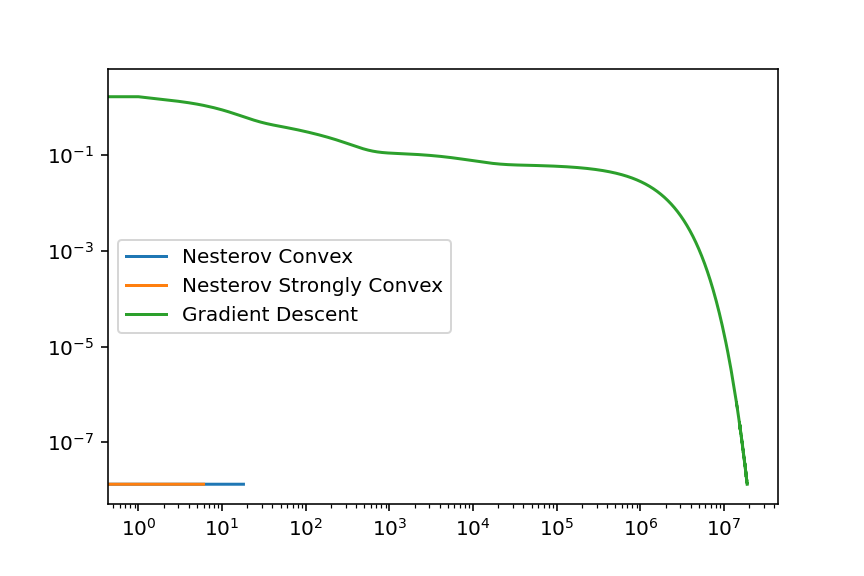

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Load data points {u_i} - uniformly spaced points in [-1,1]
u = np.load('data_u.npy')

# Load corresponding data points {y_i}
y = np.load('data_y.npy')


# add your code here

order = 9 + 1       #9 powers of u plus constant term 
n = len(u)          #size of the data sets
assert len(y) == n  #ensure that the data sets are the same length

A = np.zeros((n,order))      #generate the Vandermonde matrix, A
for i in range(n):           #loop over every element of u
    for j in range(order):   #loop over exponent in a polynomial of order 9
        A[i][j] = u[i]**j    #a_{ij} = u_i^{j}, with i,j starting at 0 
        
AtA = np.matmul(A.T, A)
Aty = np.matmul(A.T, y)
        
"""define necessary numerical constants"""

L = 100          #Lipschitz gradient constant
mu = 1           #continuously differentiable constant for strong convexity
rtol = 1e-5      #relative tolerance - how close the gradient should be to 0 at the minimiser
atol = 1e-8      #absolute tolerance - how close the gradient should be to 0 at the minimiser

"""define initial estimate for the coefficients"""

x0 = np.zeros(10)   

"""generate numerical estimates"""

#gradEst = gradDesc([AtA, Aty], x0, u, y, 1./L, grad1)                    #Estimate for minimiser from gradient descent (h = 1/L)
#nesterovEst = nesterov([AtA, Aty], x0, u, y, L, grad1)                   #Estimate for minimiser from Nesterov method for convex functions
#nesterovStrongEst = nesterovStrong([AtA, Aty], x0, u, y, L, mu, grad1)   #Estimate for minimiser from Nesterov method for strongly convex functions
#numpyEst = np.linalg.lstsq(A,y)[0]                                       #Estimate for minimiser from NumPy linalg module

"""compare numerical estimates with plot"""

def generateSol(uPlot, coeff):
    
    """calculate the polynomial determined by coeff"""
    """inputs are an array to feed into polynomial (uPlot) and the coefficients of the polynomial (coeff)"""
    """returns an array of the y-values of the fit"""
    
    result = np.ones_like(uPlot)*coeff[0]      #first term is just the constant coefficient
    
    for i in range(1,len(coeff)):              #loop for every exponent in the polynomial
        result = result + coeff[i] * uPlot**i  #add the i-th term in the polynomial
        
    return result
        

uPlot = np.linspace(np.min(u), np.max(u), 1000)          #array for plotting the polynomial regression fits

#plt.scatter(u, y, label='Data')                   #plot input raw data

#plt.plot(uPlot, generateSol(uPlot, gradEst), label='Gradient Descent')                   #plot gradient descent fit
#plt.plot(uPlot, generateSol(uPlot, nesterovEst), label='Nesterov Convex')                #plot Nesterov fit for convex functions
#plt.plot(uPlot, generateSol(uPlot, nesterovStrongEst), label='Nesterov Strongly Convex') #plot Nesterov fit for stronly convex functions
#plt.plot(uPlot, generateSol(uPlot, numpyEst), label='Numpy linalg')                      #plot NumPy linalg module fit
#plt.legend()
#plt.show()

"""compare the performance of each method"""
"""plotting how the Euclidean norm of the gradients converge with each iteration"""

gradDescNorms = gradDesc([AtA, Aty], x0, u, y, 1./L, grad1, True)                #Gradient norms from gradient descent (h = 1/L)
nesterovNorms = nesterov([AtA, Aty], x0, u, y, L, grad1, True)                   #Gradient norms from Nesterov method for convex functions
nesterovStrongNorms = nesterovStrong([AtA, Aty], x0, u, y, L, mu, grad1, True)   #Gradient norms from Nesterov method for strongly convex functions

plt.loglog(nesterovNorms, label='Nesterov Convex')
plt.loglog(nesterovStrongNorms, label='Nesterov Strongly Convex')
plt.loglog(gradDescNorms, label='Gradient Descent')

plt.legend()
plt.show()

*Add your discussion here*

Plot how x changes with each iteration for all three methods written here.

Plot the actual fits for all 4 methods

# Question 2: Regularised Polynomial Regression 

When $m \leq n$ (i.e. we are dealing with an underdetermined least squares problem), the minimisation problem in Question 1.1 is convex.

Consider now the regularised minimisation problem

$$
x_* = \text{argmin} \frac{1}{2} \|A x - y\|_2^2 + \frac{\lambda}{2} \| x\|_2^2,
$$

which is strongly convex, and hence has a unique solution $x_*$, for any choice of regularisation parameter $\lambda > 0$.

### 2.1

Show that the gradient of $\frac{1}{2} \|A x - y\|_2^2 + \frac{\lambda}{2} \| x\|_2^2$ with respect to $x$ is 

$$(A^\mathrm T A + \lambda I) x - A^\mathrm T y.$$

*Add your solution here*

Due to the linearity of the gradient operator, we can write:

$$
    \nabla{\frac{1}{2} \|A x - y\|_2^2 + \frac{\lambda}{2} \| x\|_2^2} = \nabla{\frac{1}{2} \|A x - y\|_2^2} + \nabla{\frac{\lambda}{2} \| x\|_2^2}
$$

Now we can just sub in our expression from question 1.2, leaving us to evaluate the second term in the equation above. Using a similar logic from question 1.2, where we compute the gradient element-wise:

\begin{align}
\nabla_{k}\left(\frac{\lambda}{2} \| x\|_2^2\right) &= \frac{\partial}{\partial x_k}\frac{\lambda}{2} \| x\|_2^2 \\
&= \frac{\partial}{\partial x_k}\frac{\lambda}{2}\sum_{i=1}^n(x_i)^2 \\
&= \lambda\sum_{i=1}^n(x_i)\delta_{ik} \\
&= \lambda x_{k}
\end{align}

Thus, writing the above equation in vector notation: $\nabla{\frac{\lambda}{2} \| x\|_2^2} = \lambda x$. We can now sub this result and our expression from question 1.2 into our full expression:

\begin{align}
\nabla{\frac{1}{2} \|A x - y\|_2^2 + \frac{\lambda}{2} \| x\|_2^2} &= A^\mathrm T A x - A^\mathrm T y + \lambda x \\
&= (A^\mathrm T A + \lambda I) x - A^\mathrm T y
\end{align}

as required.

### 2.2

Compare the performance of gradient descent and Nestorov in computing $x^*$ in the case $\lambda = 0$. You may want to compare your computed solution to a suitably obtained reference solution.

Include any numerical tests that you run in the code cell below. Any output you use in your discussion should be displayed and easily interpretable.

In [35]:
import numpy as np

# Load matrix A
A = np.load('data_A.npy')

# Load corresponding data points {y_i}
y = np.load('data_b.npy')


# add your code here

def grad2(As, x, y):
    
    """compute the derivative of the residual, according to the formula from 2.1"""
    """inputs are an array ([A^T.A, A^T.y]), current estimate for co-efficients (x), target data (y)"""
    """returns the gradient"""
    
    return np.matmul(As[0],x) + lam * np.matmul(np.identity(len(x)),x) - As[1]      #return A^T.A.x + lambda.I.x- A^T.y

n = A.shape[0]           #size of the data sets
order = A.shape[1]       #order of the poly fit
u = A[:,1]               #extract the u's from the A matrix
assert len(y) == len(u)  #ensure that the data sets are the same length

print("Size of data sets: ", n)
print("Order of fit: ", order)

AtA = np.matmul(A.T, A)
Aty = np.matmul(A.T, y)
        
"""define necessary numerical constants"""

L = 1000         #Lipschitz gradient constant
mu = 1           #continuously differentiable constant for strong convexity
lam = 0          #lambda will be a global variable
rtol = 1e-5      #relative tolerance - how close the gradient should be to 0 at the minimiser
atol = 1e-8      #absolute tolerance - how close the gradient should be to 0 at the minimiser

"""define initial estimate for the coefficients"""

x0 = np.zeros(order)

"""generate numerical estimates"""

gradEst = gradDesc([AtA, Aty], x0, u, y, 1./L, grad2)                    #Estimate for minimiser from gradient descent (h = 1/L)
nesterovEst = nesterov([AtA, Aty], x0, u, y, L, grad2)                   #Estimate for minimiser from Nesterov method for convex functions
nesterovStrongEst = nesterovStrong([AtA, Aty], x0, u, y, L, mu, grad2)   #Estimate for minimiser from Nesterov method for strongly convex functions
numpyEst = np.linalg.lstsq(A,y)[0]                                       #Estimate for minimiser from NumPy linalg module

"""compare numerical estimates with plot"""

uPlot = np.linspace(np.min(u), np.max(u), 1000)          #array for plotting the polynomial regression fits

plt.scatter(u, y, label='Data')                   #plot input raw data

plt.plot(uPlot, generateSol(uPlot, gradEst), label='Gradient Descent')                   #plot gradient descent fit
plt.plot(uPlot, generateSol(uPlot, nesterovEst), label='Nesterov Convex')                #plot Nesterov fit for convex functions
plt.plot(uPlot, generateSol(uPlot, nesterovStrongEst), label='Nesterov Strongly Convex') #plot Nesterov fit for stronly convex functions
plt.plot(uPlot, generateSol(uPlot, numpyEst), label='Numpy linalg')                      #plot NumPy linalg module fit
plt.legend()
plt.show()


Size of data sets:  100
Order of fit:  501


KeyboardInterrupt: 

*Add your discussion here*

In [ ]:
import numpy as np

# Load matrix A
A = np.load('data_A.npy')

# Load corresponding data points {y_i}
y = np.load('data_b.npy')


# add your code here

*Add your discussion here*

### 2.4

In the case of the Nesterov method for strongly convex functions consider the function 
$$
V(x_{k},x_{k-1})= (1-\delta)\left(f(x_{k})-f(x_{*}) +\frac{\mu}{2}\left\|\frac{(1-\delta)}{\delta}(x_{k}-x_{k-1})+x_{k}-x_{*} \right\|^{2} \right), \quad \delta=\sqrt{\frac{\mu}{L}}
$$

Show numerically that this is a Lyapunov function i.e $V(x_{k+1},x_{k}) \leq V(x_{k},x_{k-1})$ and explain briefly how you can deduce a convergence rate for $f(x_{k})-f(x_{*})$ using this



*Add your discussion here*

In [ ]:
import numpy as np

# add code here